# Dataset TAMBOS – Análisis Exploratorio de Datos (EDA)

## Contexto
Este análisis se basa en datos consolidados de servicios brindados por entidades del Gobierno del Perú a través de las plataformas fijas TAMBOS, parte del Programa Nacional de Plataformas de Acción para la Inclusión Social (PNPAIS).

El dataset ha sido previamente consolidado a partir de cuatro archivos trimestrales del año 2024.

## Objetivo del script
Realizar un Análisis Exploratorio de Datos (EDA) para:
- Comprender la estructura y calidad del dataset
- Detectar valores faltantes o inconsistencias{
- Identificar posibles valores atípicos
- Preparar el terreno para ingeniería de variables

## Variables clave
- **DEPARTAMENTO**: Región donde se ubica el Tambo
- **TAMBO**: Nombre de la plataforma fija
- **ENTIDAD**: Institución que realiza la intervención
- **TIPO_INTERVENCION**: Tipo de servicio (prestación, soporte, etc.)
- **SERVICIOS**: Número de servicios brindados
- **ATENCIONES**: Número de atenciones realizadas
- **FECHA_INTERVENCION**: Fecha en la que se realizó la actividad

---


In [55]:
# libreria para funciones estadisticas
import numpy as np
# libreria para dataframes
import pandas as pd
# librerias de graficos
import matplotlib.pyplot as plt
import seaborn as sns
# comando para poder graficar en una sola linea
%matplotlib inline

In [56]:
#para cargarlo desde github
url = "https://raw.githubusercontent.com/LeydiChavez/dataton-tambos/main/data/datos_tambos.csv"
df = pd.read_csv(url)
df.head()

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO_DISTRITAL,UBIGEO_CCPP,CODIGO_PLATAFORMA,TAMBO,NIVEL_GOBIERNO,SECTOR,ENTIDAD,TIPO_INTERVENCION,FECHA_INTERVENCION,SERVICIOS,ATENCIONES,MES,ANIO,TRIMESTRE
0,20240430,HUANCAVELICA,CASTROVIRREYNA,TANTARA,90412,904120039,210259,TANTARA,GOBIERNO CENTRAL,MIDAGRI - MINISTERIO DE DESARROLLO AGRARIO Y R...,AGRORURAL - PROGRAMA DE DESARROLLO PRODUCTIVO ...,PRESTACION DE SERVICIOS,2024-01-10,1,14,202401,2024,I
1,20240430,PIURA,HUANCABAMBA,HUARMACA,200304,2003040052,208845,CHALPA MOLULO,GOBIERNO LOCAL,GOBIERNO LOCAL,GERENCIA DE DESARROLLO SOCIAL-HUMANO,PRESTACION DE SERVICIOS,2024-02-14,1,13,202402,2024,I
2,20240430,HUANUCO,PACHITEA,CHAGLLA,100802,1008020026,255764,MUÑA,GOBIERNO CENTRAL,MINEM - MINISTERIO DE ENERGÍA Y MINAS,FISE - FONDO DE INCLUSIÓN SOCIAL ENERGÉTICA,PRESTACION DE SERVICIOS,2024-03-12,1,12,202403,2024,I
3,20240430,CUSCO,PARURO,CCAPI,81003,810030027,256106,CALLANCHA,GOBIERNO LOCAL,GOBIERNO LOCAL,DEMUNA - DEFENSORÍA MUNICIPAL DEL NIÑO Y DEL A...,PRESTACION DE SERVICIOS,2024-02-14,1,12,202402,2024,I
4,20240430,APURIMAC,COTABAMBAS,HAQUIRA,30504,305040075,256713,TULLA,GOBIERNO CENTRAL,MIDIS - MINISTERIO DE DESARROLLO E INCLUSIÓN S...,PNPAIS - PROGRAMA NACIONAL PLATAFORMAS DE ACCI...,EJECUCION DE SOPORTE,2024-03-25,5,11,202403,2024,I


In [57]:
#Mostraremos todos los nombres de las columnas
df.columns

Index(['FECHA_CORTE', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'UBIGEO_DISTRITAL', 'UBIGEO_CCPP', 'CODIGO_PLATAFORMA', 'TAMBO',
       'NIVEL_GOBIERNO', 'SECTOR', 'ENTIDAD', 'TIPO_INTERVENCION',
       'FECHA_INTERVENCION', 'SERVICIOS', 'ATENCIONES', 'MES', 'ANIO',
       'TRIMESTRE'],
      dtype='object')

In [58]:
#Veamos cuantos datos contiene nuestro DataFrame
len(df)

135539

In [59]:
pd.concat(
    [df.isnull().sum(), df.dtypes],
    axis=1,
    keys=["Valores Nulos", "Tipo de Datos"]
)

,Valores Nulos,Tipo de Datos
FECHA_CORTE,0,int64
DEPARTAMENTO,0,object
PROVINCIA,0,object
DISTRITO,0,object
UBIGEO_DISTRITAL,0,int64
UBIGEO_CCPP,0,int64
CODIGO_PLATAFORMA,0,int64
TAMBO,0,object
NIVEL_GOBIERNO,0,object
SECTOR,0,object


## 1. FECHA_CORTE ( variable cuantitativa continua)

In [60]:
#Observamos las variables
df["FECHA_CORTE"].unique()

array([20240430, 20240819, 20241017, 20250116])

Convertimos la columna FECHA_CORTE de entero (formato YYYYMMDD) a datetime para facilitar su análisis temporal

In [61]:
#Convertimos FECHA_CORTE a datetime
# coerse: reemplaza por NaT en lugar de lazar un error
df["FECHA_CORTE"] = pd.to_datetime(df["FECHA_CORTE"], format="%Y%m%d", errors="coerce")

In [62]:
#Vizualizamos si se ha realizado el cambio de manera correcta
print(df["FECHA_CORTE"].head())

0   2024-04-30
1   2024-04-30
2   2024-04-30
3   2024-04-30
4   2024-04-30
Name: FECHA_CORTE, dtype: datetime64[ns]


In [63]:
# Creamos una nueva columna con etiquetas por trimestre para facilitar la agrupación y al momento leer las graficas
df["TRIMESTRE_CORTE"] = df["FECHA_CORTE"].map({
    pd.Timestamp("2024-04-30"): "T1",
    pd.Timestamp("2024-08-19"): "T2",
    pd.Timestamp("2024-10-17"): "T3",
    pd.Timestamp("2025-01-16"): "T4"
})


Evaluaremos cuantos resgritos hay por cada corte de trimestre que se ha realizado

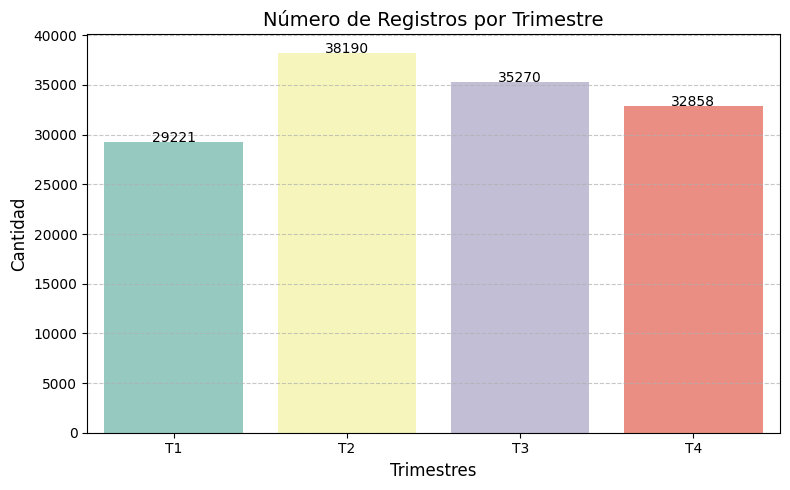

In [66]:
# Contar la cantidad
cant = df['TRIMESTRE_CORTE'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=cant.index, y=cant.values,hue=cant.index,legend=False , palette="Set3")

# para las numeraciones de cada barra
for i, value in enumerate(cant.values):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=10)

plt.title('Número de Registros por Trimestre', fontsize=14)
plt.xlabel('Trimestres', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
#plt.xticks(rotation=90) #al tener los nombres grandes ayuda a su visualizacion
#plt.yscale('log') #utilizaremos una escala logaritmica para tener una mejor visualizacion
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observaciones:
- El trimestre con mayor número de registros fue T2 (abril-junio), con más de 38 mil entradas.
- T1 (enero-marzo) presenta el menor número de registros (~29 mil), lo cual podría estar asociado al inicio del año fiscal, planificación institucional o menor actividad operativa.

Esta variación puede influir en los análisis posteriores, por lo que podría ser útil normalizar ciertas métricas por trimestre o investigar si la distribución afecta la representatividad.

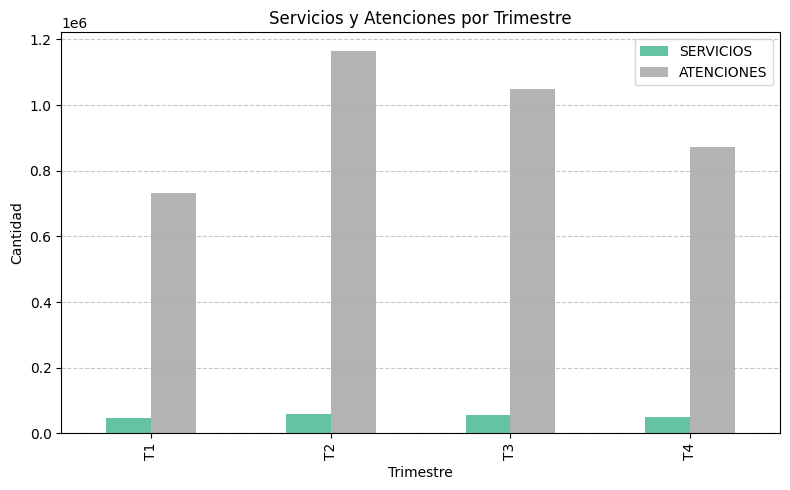

In [94]:
agrupado = df.groupby("TRIMESTRE_CORTE")[["SERVICIOS", "ATENCIONES"]].sum()

# Creamos la figura y los ejes con .plot()
ax = agrupado.plot(kind="bar", figsize=(8, 5), colormap="Set2")

# Añadimos texto encima de las barras
#for i in range(len(agrupado)):
#    ax.text(i - 0.2, agrupado["SERVICIOS"][i] + 20000, f'{agrupado["SERVICIOS"][i]:,}', color='black', fontsize=9)
#    ax.text(i + 0.05, agrupado["ATENCIONES"][i] + 20000, f'{agrupado["ATENCIONES"][i]:,}', color='black', fontsize=9)

# Ajustes del gráfico
plt.title("Servicios y Atenciones por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Cantidad")
#plt.xticks(rotation=90) #al tener los nombres grandes ayuda a su visualizacion
#plt.yscale('log') #utilizaremos una escala logaritmica para tener una mejor visualizacion
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 2. DEPARTAMENTO ( variable categorica)

In [81]:
#Observamos las variables
df["DEPARTAMENTO"].unique()

array(['HUANCAVELICA', 'PIURA', 'HUANUCO', 'CUSCO', 'APURIMAC',
       'CAJAMARCA', 'JUNIN', 'AYACUCHO', 'ANCASH', 'PUNO', 'AMAZONAS',
       'LORETO', 'LA LIBERTAD', 'PASCO', 'AREQUIPA', 'SAN MARTIN',
       'MADRE DE DIOS', 'UCAYALI', 'MOQUEGUA', 'TACNA', 'LAMBAYEQUE',
       'LIMA'], dtype=object)

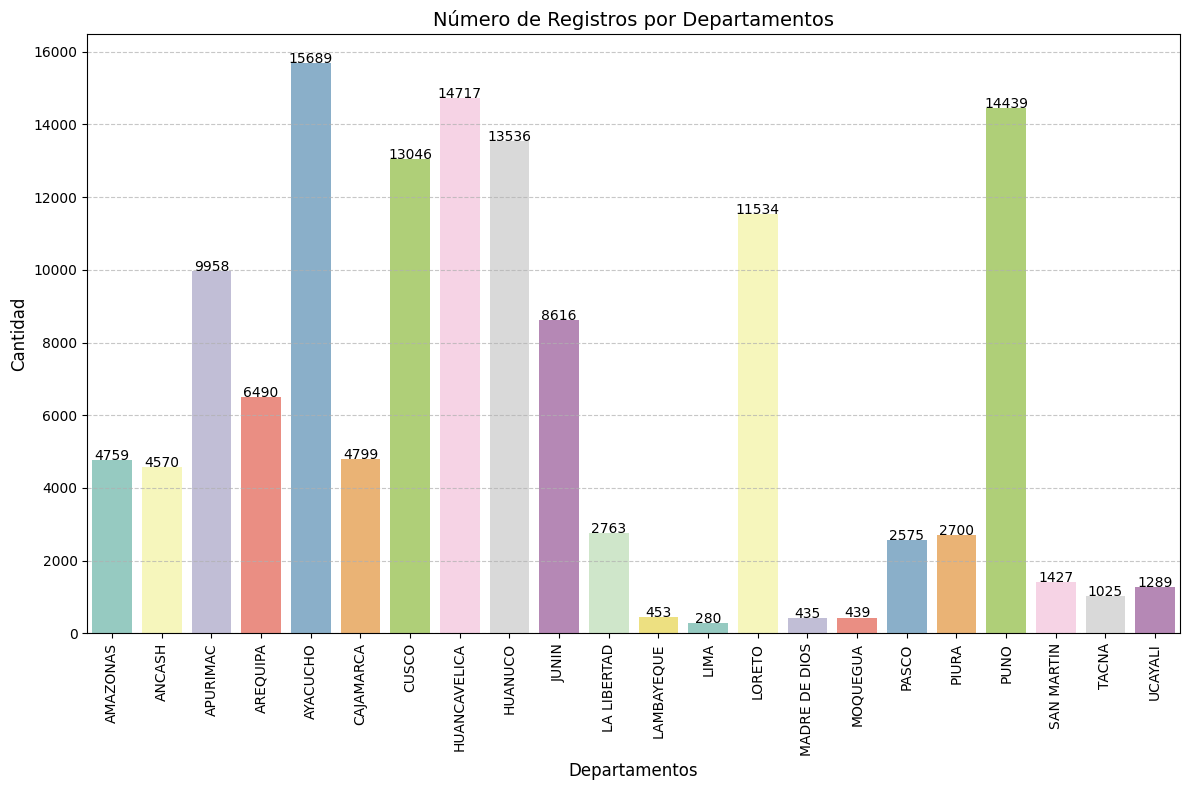

In [102]:
# Contar la cantidad
dep = df['DEPARTAMENTO'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=dep.index, y=dep.values,hue=dep.index,legend=False , palette="Set3")

# para las numeraciones de cada barra
for i, value in enumerate(dep.values):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=10)

plt.title('Número de Registros por Departamentos', fontsize=14)
plt.xlabel('Departamentos', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=90) #al tener los nombres grandes ayuda a su visualizacion
#plt.yscale('log') #utilizaremos una escala logaritmica para tener una mejor visualizacion
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Alta concentración en departamentos rurales y de difícil acceso:
  - Ayacucho (15,689), Huancavelica (14,717), Puno (14,439), Huánuco (13,536), y Cusco (13,046) son los departamentos con mayor número de registros.

  - Esto sugiere que las plataformas fijas TAMBOS están teniendo una mayor actividad o presencia en zonas rurales o altoandinas, donde la cobertura de servicios estatales suele ser menor por accesibilidad geográfica.

  - Refuerza el objetivo del programa PNPAIS de cerrar brechas sociales y geográficas.

- Baja presencia en zonas urbanas o costeras:

  - Departamentos como Lima (280), Lambayeque (453), Moquegua (439), Madre de Dios (435) y Tacna (1,025) presentan los valores más bajos.

  - Esto podría explicarse porque en zonas urbanas o de mayor infraestructura ya existen otros canales de atención, por lo tanto, los TAMBOS no son tan necesarios.

- Posible correlación entre ruralidad y necesidad de intervención:

  - La mayor cantidad de servicios en zonas como Ayacucho y Huancavelica puede deberse a niveles más altos de pobreza, aislamiento geográfico o menor infraestructura estatal previa.

  - Es probable que estos departamentos concentren más campañas itinerantes o intervenciones múltiples por parte de diferentes sectores del Estado.

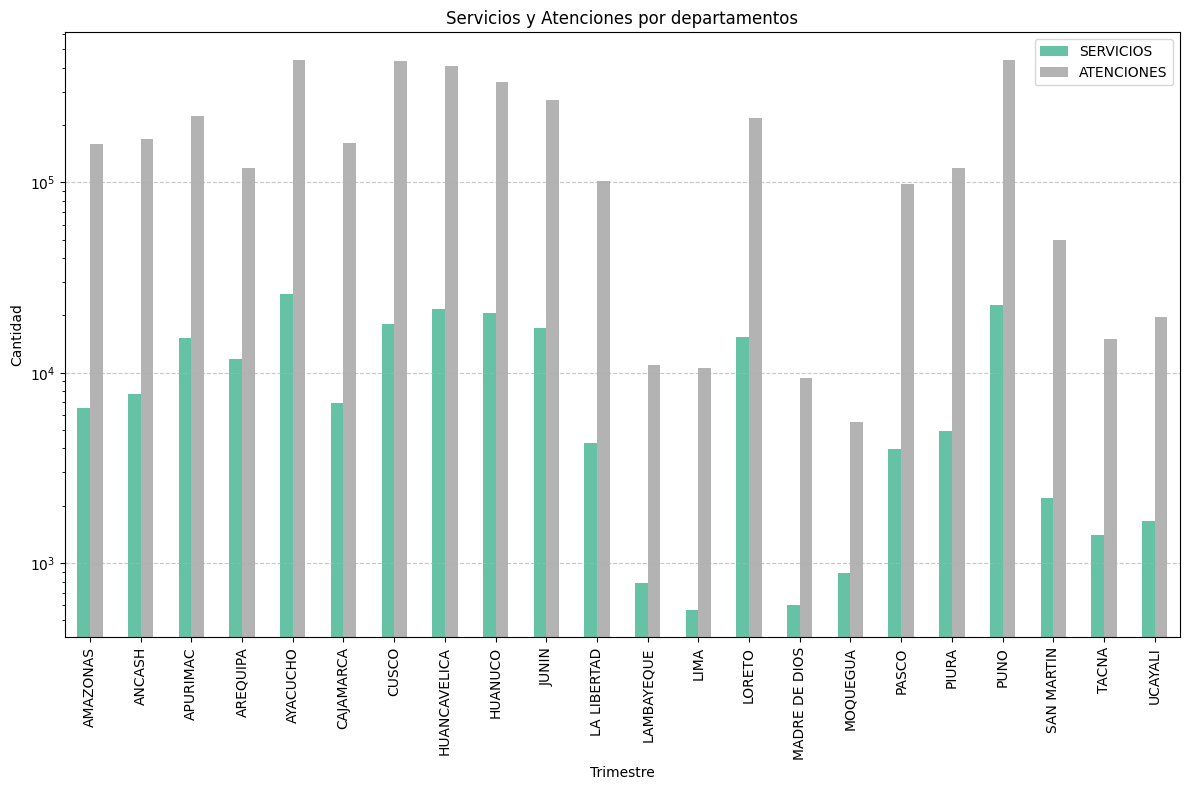

In [110]:
agrupado_2 = df.groupby("DEPARTAMENTO")[["SERVICIOS", "ATENCIONES"]].sum()

# Creamos la figura y los ejes con .plot()
ax = agrupado_2.plot(kind="bar", figsize=(12, 8), colormap="Set2")

# Añadimos texto encima de las barras
#for i in range(len(agrupado)):
#    ax.text(i - 0.2, agrupado["SERVICIOS"][i] + 20000, f'{agrupado["SERVICIOS"][i]:,}', color='black', fontsize=9)
#    ax.text(i + 0.05, agrupado["ATENCIONES"][i] + 20000, f'{agrupado["ATENCIONES"][i]:,}', color='black', fontsize=9)

# Ajustes del gráfico
plt.title("Servicios y Atenciones por departamentos")
plt.xlabel("Trimestre")
plt.ylabel("Cantidad")
plt.xticks(rotation=90) #al tener los nombres grandes ayuda a su visualizacion
plt.yscale('log') #utilizaremos una escala logaritmica para tener una mejor visualizacion
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3. PROVINCIA ( variable categorica)

In [96]:
#Observamos las variables
df["PROVINCIA"].unique()

array(['CASTROVIRREYNA', 'HUANCABAMBA', 'PACHITEA', 'PARURO',
       'COTABAMBAS', 'CAJAMARCA', 'ABANCAY', 'TAYACAJA', 'CALCA',
       'HUANCAYO', 'SATIPO', 'HUAMANGA', 'LA MAR', 'RECUAY', 'CARABAYA',
       'EL COLLAO', 'URUBAMBA', 'HUAYTARA', 'AYABACA', 'ESPINAR',
       'CANGALLO', 'CHACHAPOYAS', 'PARINACOCHAS', 'JUNIN', 'CHUCUITO',
       'ALTO AMAZONAS', 'BAGUA', 'CUTERVO', 'CHURCAMPA', 'HUAMALIES',
       'AYMARAES', 'UCAYALI', 'PATAZ', 'CANAS', 'DANIEL ALCIDES CARRION',
       'HUANCA SANCOS', 'AIJA', 'SAN ANTONIO DE PUTINA', 'SAN MARCOS',
       'ANGARAES', 'MAYNAS', 'LA CONVENCION', 'CAYLLOMA', 'HUANUCO',
       'LEONCIO PRADO', 'HUANCAVELICA', 'CONDESUYOS', 'CASTILLA',
       'MARISCAL CACERES', 'LAURICOCHA', 'DATEM DEL MARAÑON', 'PUTUMAYO',
       'ANTA', 'MARISCAL RAMON CASTILLA', 'CAJABAMBA', 'CONDORCANQUI',
       'REQUENA', 'AMBO', 'JAUJA', 'VILCAS HUAMAN', 'ANTONIO RAYMONDI',
       'LUCANAS', 'DOS DE MAYO', 'PAUCAR DEL SARA SARA', 'PUNO', 'SANDIA',
       'CONCEPCION',

## 3. DISTRITO ( variable categorica)

In [103]:
#Observamos las variables
df["DISTRITO"].unique()

array(['TANTARA', 'HUARMACA', 'CHAGLLA', 'CCAPI', 'HAQUIRA', 'CHETILLA',
       'CURAHUASI', 'QUICHUAS', 'SAN SALVADOR', 'COLCABAMBA',
       'PARIAHUANCA', 'PANGOA', 'ACOS VINCHOS', 'SAMUGARI', 'RECUAY',
       'ITUATA', 'CAPAZO', 'OLLANTAYTAMBO', 'PILPICHACA', 'PACAIPAMPA',
       'OCROS', 'CONDOROMA', 'LOS MOROCHUCOS', 'RIO TAMBO', 'SOCOS',
       'QUINJALCA', 'CORACORA', 'ONDORES', 'TAMBOBAMBA', 'ZEPITA',
       'LAGUNAS', 'ARAMANGO', 'OMACHA', 'QUEROCOTILLO',
       'SAN PEDRO DE CORIS', 'SANTA ANA', 'CHAVIN DE PARIARCA',
       'HUAMATAMBO', 'TAPAIRIHUA', 'SARAYACU', 'TAYABAMBA', 'QUEHUE',
       'SAN ANTONIO DE CUSICANCHA', 'COYLLURQUI', 'SANTA ANA DE TUSI',
       'SANTIAGO DE PISCHA', 'SACSAMARCA', 'SANTIAGO DE CHOCORVOS',
       'CORIS', 'PEDRO VILCA APAZA', 'JOSE SABOGAL', 'LIRCAY', 'NAPO',
       'MEGANTONI', 'CORDOVA', 'BALSAPUERTO', 'TAPAY',
       'SAN PABLO DE PILLAO', 'DANIEL ALOMIA ROBLES', 'LARIA',
       'CHURUBAMBA', 'CAYARANI', 'CHACHAS', 'PAJARILLO',
       'SAN 

## TAMBO

In [111]:
#Observamos las variables
df["TAMBO"].unique()

array(['TANTARA', 'CHALPA MOLULO', 'MUÑA', 'CALLANCHA', 'TULLA',
       'COCHAPAMPA', 'SAYWITE', 'SAN ISIDRO DE MUTUYPATA', 'CCAMAHUARA',
       'RANRA', 'PANTI', 'CUBANTIA', 'PACCO LOMA -HUAYCHAO', 'SANABAMBA',
       'CORDILLERA BLANCA', 'UPINA', 'CAPAZO', 'YANAMAYO',
       'SAN JUAN DE OCORO', 'CURILCAS', 'CCERAOCRO', 'PUEBLO ANTIGUO',
       'CUSIBAMBA', 'CUTIVIRENI', 'PAUCHO', 'QUINJALCA', 'HURAY HUMA',
       'SAN PEDRO DE PARI', 'QQUELLO', 'TANCA TANCA', 'VALLE ESMERALDA',
       'TAMARATE', 'COPALLIN DE ARAMANGO', 'ANTAYAJE', 'SILLANGATE',
       'OXAPATA', 'PUCAPAMPA', 'SAN MARTIN', 'HUAMATAMBO', 'PALLCORA',
       'SAMAN', 'LA VICTORIA', 'HUACAS ALTO', 'PERCCARO', 'SACSAQUERO',
       'ITAÑA', 'JUCLACANCHA', 'CCAYARPACHI', 'YURAQ PUNKO',
       'SANTIAGO DE CHOCORVOS', 'VILLA CORIS', 'TZOMAVENI',
       'TUPAC AMARU AYRAMPUNI', 'JALCAPAMPA', 'CHAHUARMA',
       'DIAMANTE AZUL', 'KIRIGUETI', 'LOS ARENALES', 'MOYOBAMBILLO',
       'COSÑIRHUA', 'SAN PABLO DE PILLAO', 'FLORES DE

## NIVEL_GOBIERNO

In [114]:
#Observamos las variables
df["NIVEL_GOBIERNO"].unique()

array(['GOBIERNO CENTRAL', 'GOBIERNO LOCAL', 'GOBIERNO REGIONAL',
       'ORGANISMOS AUTÓNOMOS', 'ONG', 'ORGANIZACIONES CIVILES',
       'SECTOR PRIVADO', 'UNIVERSIDADES', 'ORGANIZACIONES RELIGIOSAS',
       'COOPERACIÓN INTERNACIONAL'], dtype=object)